# Model 2 --> Multiple Linear Regression Models 


In [3]:
# !pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression

<font size = 4> The size of the dataset is too big to be loaded all in once, so each file .json must be saved in another directory after being modified (the directory and the files are identified by the arbitrary number '112723'). We apply VADER score sentiment analysis on the text reviews and data cleaning. <font>

In [4]:
def sanitize_text_reviews(df):
    df['clean_text_reviews'] = df['reviewText'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def sanitize_text_summary(df):
    df['clean_text_summary'] = df['summary'].str.lower().str.replace(r"[^[a-zA-Z0-9_\t\n\r\s]", r" ", regex=True)
    return df

def to_tidy_format_reviews(df):
    tidy_df_reviews = (
        df["clean_text_reviews"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_reviews": "word"})
    )
    return tidy_df_reviews

def to_tidy_format_summary(df):
    tidy_df_summary = (
        df["clean_text_summary"]
        .str.split()
        .explode()
        .to_frame()
        .rename(columns={"clean_text_summary": "word"})
    )
    return tidy_df_summary

def add_polarity_reviews(df, tidy_df_reviews):
    df["polarity_reviews"] = (
        tidy_df_reviews
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

def add_polarity_summary(df, tidy_df_summary):
    df["polarity_summary"] = (
        tidy_df_summary
        .merge(sent, how='left', left_on='word', right_index=True)
        .reset_index()
        .loc[:, ['index', 'polarity']]
        .fillna(0)
        .groupby('index')
        .sum()
    )
    return df

print(''.join(open("../data/vader_lexicon.txt").readlines()[:10]))
sent = pd.read_csv("../data/vader_lexicon.txt", sep='\t', header = None).loc[:, [0,1]].rename(columns={0: "token", 1: "polarity"}).set_index('token')
sent.head()

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [5]:
df = pd.read_json("../data/Original/Patio_Lawn_and_Garden_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day', 'asin' , 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Lawn_112723.json")

In [6]:
df = pd.read_json("../data/Original/Tools_and_Home_Improvement_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Tools_112723.json")

In [7]:
df = pd.read_json("../data/Original/Toys_and_Games_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin', 'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/Toys_112723.json")

In [8]:
df = pd.read_json("../data/Original/Video_Games_5.json", lines=True, encoding='latin-1')
df['year'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.year
df['month'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.month
df['day'] = pd.to_datetime(df['unixReviewTime'], unit='s').dt.day
df = sanitize_text_reviews(df)
df = sanitize_text_summary(df)
tidy_df_reviews = to_tidy_format_reviews(df)
tidy_df_summary = to_tidy_format_summary(df)
df = add_polarity_reviews(df, tidy_df_reviews)
df = add_polarity_summary(df, tidy_df_summary)
df = df[['year', 'month', 'day','asin',  'overall', 'verified', 'reviewerID', 'reviewerName', 'reviewText', 'summary','vote', 'polarity_reviews', 'polarity_summary']]
df['length of review'] = df['reviewText'].str.len()
df.to_json("../data/112723/VideoGames_112723.json")

In [9]:
# outdoor categories 
lawn= pd.read_json("../data/112723/Lawn_112723.json", lines=False, encoding="latin-1")

#sports = pd.read_json("Sports_112723.json", lines=False, encoding="latin-1")

tools = pd.read_json("../data/112723/Tools_112723.json", lines=False, encoding="latin-1")

In [10]:
# indoor categories
toys= pd.read_json("../data/112723/Toys_112723.json", lines=False, encoding="latin-1")

video_games = pd.read_json("../data/112723/VideoGames_112723.json", lines=False, encoding="latin-1")

#movies = pd.read_json("Movies_112723.json", lines=False, encoding="latin-1")

#kindle = pd.read_json("Kindle_112723.json", lines=False, encoding="latin-1")

In [11]:
print(len(toys))
toys.drop_duplicates()
print(len(toys))

1828971
1828971


In [12]:
out = pd.concat([lawn,  tools])

ind = pd.concat([toys,video_games])

data = pd.concat([out, ind])

In [13]:
data['length of review'] = data['reviewText'].replace('None', '').fillna('').str.split().apply(len)

In [14]:
out['length of review'] = out['reviewText'].replace('None', '').fillna('').str.split().apply(len)

In [15]:
data["polarity_reviews"].describe()

count    5.195794e+06
mean     5.197836e+00
std      7.340389e+00
min     -2.533000e+02
25%      1.800000e+00
50%      3.300000e+00
75%      6.800000e+00
max      9.216000e+02
Name: polarity_reviews, dtype: float64

In [16]:
data['vote'] = data['vote'].fillna('0').str.replace(',', '')

# Convert the 'vote' column to integers
data['vote'] =data['vote'].astype(int)

data['verified'] = data['verified'].astype(int)

<font size = 4> We use a heatmap to see the correlation between the features.<font>

Text(0.5, 1.0, 'Heat Map of Combined dataset')

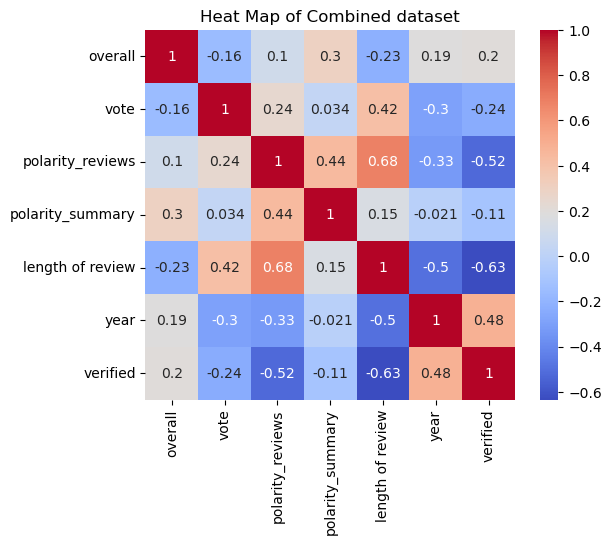

In [17]:
feats = data.groupby("asin")[["overall","vote", "polarity_reviews", "polarity_summary", "length of review", "year", "verified"]].mean()
#feats["count"] = feats.groupby("asin")["overall"].count()


feats.head()

p_norm = np.corrcoef(feats.T)
hm = sns.heatmap(p_norm, cbar=True, cmap='coolwarm', square=True, yticklabels= feats.columns,xticklabels=feats.columns, annot=True)
plt.title("Heat Map of Combined dataset")

# Model 1 predict overall --> did not work 

Intercept: -35.4
    Slope: 0.0
SD(model errors): 0.51
SD( actual overall): 0.52
size of error decreased by 3.32 %
0.25643383931557295 0.2756137066001866
0.5063929692596185 0.5249892442709532
                 mse (model): 0.25643383931557295,                 rmse (model): 0.5063929692596185  
mse (avg overall of dataset): 0.2756137066001866,   rmse (avg overall of dataset): 0.5249892442709532
rmse reduced by 3.542220191036316%


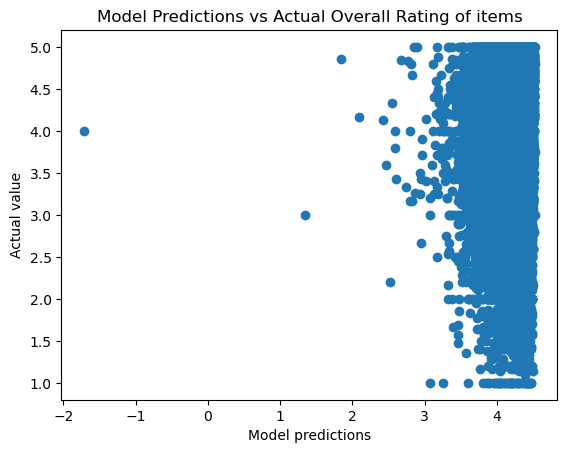

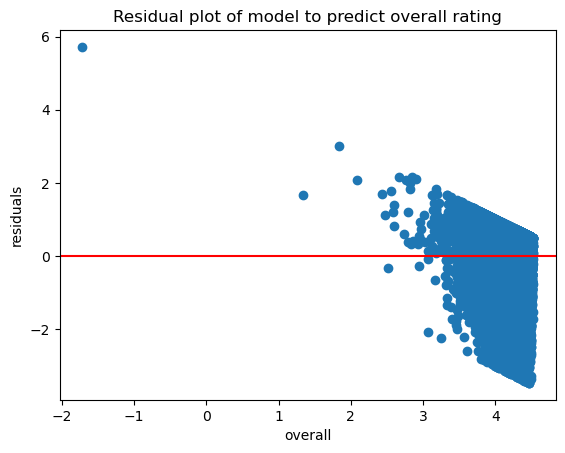

In [18]:
X = feats[['year', "length of review", "verified", "vote"]]
y = feats['overall'] 

model =  LinearRegression().fit(X, y) 
print(f"Intercept: {model.intercept_:.1f}")
print(f"    Slope: {model.coef_[0]:.1f}")

prediction = model.predict(X)
error = y - prediction

plt.scatter(prediction, y)
plt.title("Model Predictions vs Actual Overall Rating of items")
plt.xlabel("Model predictions")
plt.ylabel("Actual value")
#plt.ylim(0,5)
#plt.xlim(0,5)
plt.figure()

decrease = (1- np.std(error)/np.std(feats['overall']))*100

print(f"SD(model errors): {np.std(error):.2f}")
print(f"SD( actual overall): {np.std(feats['overall']):.2f}")
print(f'size of error decreased by {decrease:.2f} %')

mse_model = np.mean(error**2)
mse_avg = np.mean((data["overall"].mean() - y)**2)
#mse_avg = np.mean((3.8 - y)**2)
rmse_model = np.sqrt(mse_model)
rmse_avg = np.sqrt(mse_avg)
print(mse_model, mse_avg)
print(rmse_model, rmse_avg)

plt.scatter(x=prediction, y=error)
plt.axhline(y =0, color='red')
plt.title("Residual plot of model to predict overall rating")
plt.xlabel("overall")
plt.ylabel("residuals")

mse_model = np.mean(error**2)
#mse_avg = np.mean(()**2)
mse_avg = np.mean((data["overall"].mean() - y)**2)
rmse_model = np.sqrt(mse_model)
rmse_avg = np.sqrt(mse_avg)
print(f"                 mse (model): {mse_model},                 rmse (model): {rmse_model}  ")
print(f"mse (avg overall of dataset): {mse_avg},   rmse (avg overall of dataset): {rmse_avg}")
percent_increase=((1-(rmse_model)/rmse_avg))
print(f"rmse reduced by {percent_increase*100}%")

# Model #2 predict polarity of reviews 

Intercept: -161.6
    Slope: 0.08295
     SD(errors): 2.56
SD(polarity_reviews): 3.56
size of error decreased by 27.954775651498988 %
                  mse (model): 6.565580699701661,                      rmse (model): 2.5623389119516684  
mse (avg polarity of dataset): 12.649385384396934,   rmse (avg polarity of dataset): 3.5565974448054893
rmse reduced by 27.955329448542553%


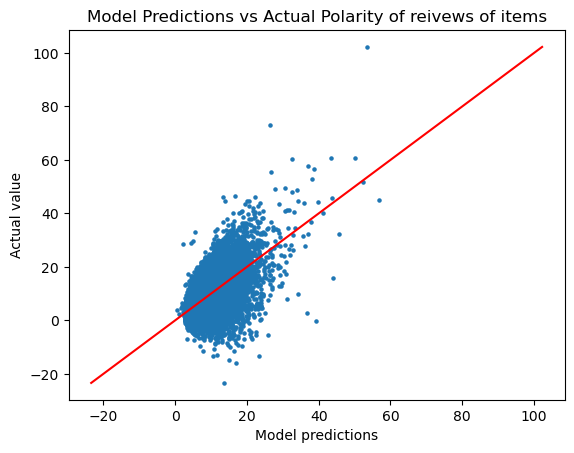

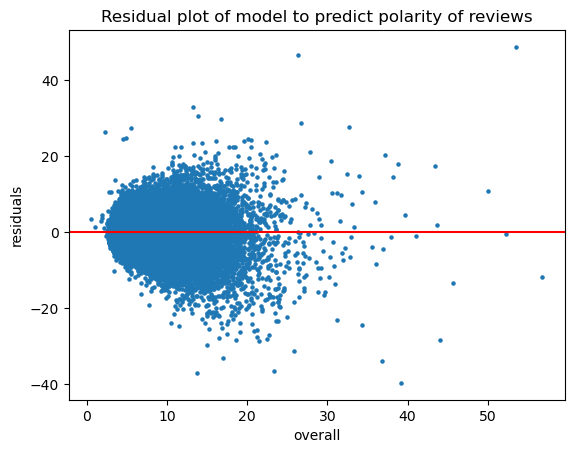

In [19]:
X = feats[['year', "length of review", "verified", "vote"]]
y = feats['polarity_reviews'] 

model =  LinearRegression().fit(X, y) 
print(f"Intercept: {model.intercept_:.1f}")
print(f"    Slope: {model.coef_[0]:.5f}")

prediction = model.predict(X)
error = y - prediction

feats["polarity_pred"]=prediction

plt.scatter(prediction, y, s=5)
combined_range = np.linspace(min(min(prediction), min(y)), max(max(prediction), max(y)), 100)
plt.plot(combined_range, combined_range, 'r-')
plt.title("Model Predictions vs Actual Polarity of reivews of items")
plt.xlabel("Model predictions")
plt.ylabel("Actual value")
plt.figure()

decrease = (1- np.std(error)/np.std(feats['polarity_reviews']))*100

print(f"     SD(errors): {np.std(error):.2f}")
print(f"SD(polarity_reviews): {np.std(feats['polarity_reviews']):.2f}")
print(f'size of error decreased by {decrease:} %')

plt.scatter(x=prediction, y=error,s=5)
plt.axhline(y =0, color='red')
plt.xlabel("overall")
plt.ylabel("residuals")
plt.title("Residual plot of model to predict polarity of reviews")


mse_model = np.mean(error**2)
mse_avg = np.mean((data["polarity_reviews"].mean() - y)**2)
rmse_model = np.sqrt(mse_model)
rmse_avg = np.sqrt(mse_avg)
print(f"                  mse (model): {mse_model},                      rmse (model): {rmse_model}  ")
print(f"mse (avg polarity of dataset): {mse_avg},   rmse (avg polarity of dataset): {rmse_avg}")
percent_increase=((1-(rmse_model)/rmse_avg))
print(f"rmse reduced by {percent_increase*100}%")